In [2]:
import os
import sys

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm

# from sklearn.cluster import KMeans, spectral_clustering
# from sklearn.preprocessing import StandardScaler, MinMaxScaler
# from sklearn.metrics import silhouette_score, silhouette_samples
from copy import deepcopy

In [3]:
os.chdir("/home/g.esposito/sc2-benchmark")
path = os.getcwd()

log_folders = [file_path for file_path in os.listdir("/home/g.esposito/sc2-benchmark") if file_path.startswith("FSIM_W_hpc_obj_v2_")]
# print(log_folders)

general_report = pd.DataFrame([])
for layer_conf in log_folders:
    if layer_conf != ".DS_Store":
        folder_path = os.path.join(path,  layer_conf)
        for cnf in [files for files in os.listdir(folder_path) if files != ".DS_Store"]:
            file_path = os.path.join(folder_path, cnf)

            report_path = os.path.join(file_path, "Faulty_boxes_report.csv")
            report = pd.read_csv(report_path)
            report['conf_detail'] = cnf.split("_")[0] if cnf.split("_")[0] != "cnf77" else "teacher_cnf"
            # print(report.columns)
            report['bit_faulty_position'] = np.log2(report['bitmask'])
            report.drop(columns=['Unnamed: 0'], inplace=True)
            general_report = pd.concat([general_report, report], axis=0, ignore_index=True)

general_report['iou_score'] = general_report['iou score']
general_report.drop(columns="iou score", inplace=True)
general_report.describe()

,imID,layer,kernel,channel,row,col,bitmask,G_lab,F_count,F_lab,G_count,G_score,T_count,area_ratio,confidence_covered,f_candidate_conf,bit_faulty_position,iou_score
count,2.411974e+06,2.411974e+06,2.411974e+06,2.411974e+06,2.411974e+06,2.411974e+06,2.411974e+06,2.411974e+06,2.411974e+06,981738.000000,2.411974e+06,2.411974e+06,2.411974e+06,981738.000000,2.411974e+06,981738.000000,2.411974e+06,981738.000000
mean,5.224520e+01,2.076553e+00,3.622244e+01,4.211309e+01,1.073849e+00,1.083686e+00,7.865734e+08,2.685324e+01,4.859812e+00,27.475076,1.033978e+01,8.918221e+01,1.254965e+01,120.079560,3.891398e-01,82.386919,2.829921e+01,74.933528
std,3.016037e+01,1.540902e+00,4.889412e+01,5.520564e+01,1.492804e+00,1.513923e+00,5.591063e+08,2.794151e+01,7.573178e+00,28.227779,6.326441e+00,9.435545e+00,8.008918e+00,617.296036,4.875552e-01,17.047429,2.836906e+00,23.826237
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.048576e+06,1.000000e+00,0.000000e+00,1.000000,1.000000e+00,7.000193e+01,1.000000e+00,0.018875,0.000000e+00,5.000713,2.000000e+01,0.000000
25%,2.500000e+01,1.000000e+00,3.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,1.342177e+08,1.000000e+00,0.000000e+00,1.000000,6.000000e+00,8.108287e+01,7.000000e+00,87.675946,0.000000e+00,74.433911,2.700000e+01,75.000000
50%,5.300000e+01,2.000000e+00,2.300000e+01,2.600000e+01,1.000000e+00,1.000000e+00,1.073742e+09,1.000000e+01,0.000000e+00,10.000000,9.000000e+00,9.213619e+01,1.100000e+01,99.812383,0.000000e+00,86.237514,3.000000e+01,84.147870
75%,7.900000e+01,4.000000e+00,4.800000e+01,5.300000e+01,1.000000e+00,1.000000e+00,1.073742e+09,5.500000e+01,8.000000e+00,57.000000,1.300000e+01,9.798565e+01,1.700000e+01,113.213724,1.000000e+00,94.765911,3.000000e+01,87.942849
max,9.900000e+01,4.000000e+00,2.550000e+02,2.550000e+02,6.000000e+00,6.000000e+00,2.147484e+09,8.800000e+01,4.300000e+01,90.000000,2.900000e+01,9.998887e+01,3.400000e+01,219504.687500,1.000000e+00,100.000000,3.100000e+01,100.000000


In [4]:
counter = 0
print(len(general_report.query("F_lab!=G_lab")))
print(len(general_report))

1496712
2411974


In [14]:
# Define the desired order of the categories
desired_order = ['cnf1', 'cnf2', 'cnf3', 'cnf6', 'cnf9', 'cnf12', 'teacher_cnf']

# Sort the data by the categorical variable
general_report = general_report.sort_values(by='conf_detail')
general_report['conf_detail'] = general_report['conf_detail'].astype('category')
general_report['conf_detail'].cat.reorder_categories(desired_order, inplace=True)

<ipython-input-14-0eb8d35444be>:7: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  general_report['conf_detail'].cat.reorder_categories(desired_order, inplace=True)


In [15]:
# general_report.query("F_lab!=G_lab").describe()
general_report.query("iou_score < 90 and F_lab==G_lab and confidence_covered==1.0").describe()

,imID,layer,kernel,channel,row,col,bitmask,G_lab,F_count,F_lab,G_count,G_score,T_count,area_ratio,confidence_covered,f_candidate_conf,bit_faulty_position,iou_score,confidence_ratio
count,888188.000000,888188.000000,888188.000000,888188.00000,888188.000000,888188.000000,8.881880e+05,888188.000000,888188.000000,888188.000000,888188.000000,888188.000000,888188.000000,888188.000000,888188.0,888188.000000,888188.000000,888188.000000,888188.000000
mean,54.459933,2.010535,35.939810,31.70213,1.123922,1.123432,3.722225e+08,26.650331,12.215982,26.650331,10.671305,87.207421,12.947137,102.994764,1.0,85.942701,25.823344,79.552119,0.985199
std,30.240715,1.589728,51.272205,39.87830,1.507188,1.517405,6.879588e+08,27.932322,7.575250,27.932322,6.450711,9.063985,8.109325,72.028023,0.0,10.656385,3.089016,16.549630,0.064393
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.048576e+06,1.000000,1.000000,1.000000,1.000000,70.001930,1.000000,0.462736,1.0,60.000134,20.000000,0.000000,0.605224
25%,26.000000,1.000000,2.000000,2.00000,0.000000,0.000000,1.677722e+07,1.000000,7.000000,1.000000,6.000000,79.068840,7.000000,88.756614,1.0,77.447385,24.000000,77.897649,0.976880
50%,59.000000,2.000000,20.000000,24.00000,1.000000,1.000000,6.710886e+07,9.000000,11.000000,9.000000,10.000000,89.036024,12.000000,100.000000,1.0,88.344857,26.000000,84.902085,0.998990
75%,79.000000,4.000000,47.000000,46.00000,1.000000,1.000000,2.684355e+08,56.000000,15.000000,56.000000,13.000000,95.450270,17.000000,112.951115,1.0,95.329368,28.000000,88.125150,1.008721
max,99.000000,4.000000,255.000000,255.00000,6.000000,6.000000,2.147484e+09,88.000000,43.000000,88.000000,29.000000,99.986994,34.000000,15638.709677,1.0,100.000000,31.000000,89.999874,1.386446


In [16]:
general_report.query("iou_score < 90 and F_lab==G_lab").groupby(by="layer").count()

,FaultID,imID,kernel,channel,row,col,bitmask,G_lab,g_bb,F_count,...,G_count,G_score,T_count,area_ratio,confidence_covered,f_candidate_conf,conf_detail,bit_faulty_position,iou_score,confidence_ratio
layer,,,,,,,,,,,,,,,,,,,,,
0,217243,217243,217243,217243,217243,217243,217243,217243,217243,217243,...,217243,217243,217243,217243,217243,217243,217243,217243,217243,217243
1,204620,204620,204620,204620,204620,204620,204620,204620,204620,204620,...,204620,204620,204620,204620,204620,204620,204620,204620,204620,204620
2,129423,129423,129423,129423,129423,129423,129423,129423,129423,129423,...,129423,129423,129423,129423,129423,129423,129423,129423,129423,129423
3,69691,69691,69691,69691,69691,69691,69691,69691,69691,69691,...,69691,69691,69691,69691,69691,69691,69691,69691,69691,69691
4,290373,290373,290373,290373,290373,290373,290373,290373,290373,290373,...,290373,290373,290373,290373,290373,290373,290373,290373,290373,290373


## Regression Task Criticality

In [17]:
print(f'Percentage of critical boxes because of the low iou score: {len(general_report.query("iou_score < 90 and F_lab==G_lab and confidence_covered==1.0"))/len(general_report)}')

Percentage of critical boxes because of the low iou score: 0.36824111702696627



Most of the boxes are here reported because of the iou_score which is critical and not for the different label

In [18]:
general_report['confidence_ratio'] = general_report['f_candidate_conf'] / general_report['G_score']
score_report = general_report.query("iou_score < 90 and F_lab==G_lab and confidence_covered==1.0")
# general_report['confidence_ratio'].describe()

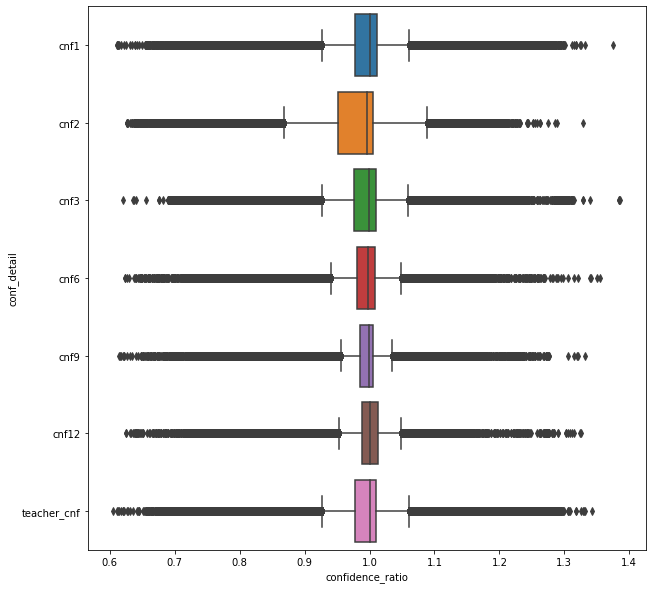

In [19]:

# score_report['confidence_ratio'] = np.log(score_report['confidence_ratio'])
fig, ax = plt.subplots(1,1, figsize=(10,10))
sns.boxplot(x='confidence_ratio', y = 'conf_detail', data = score_report)

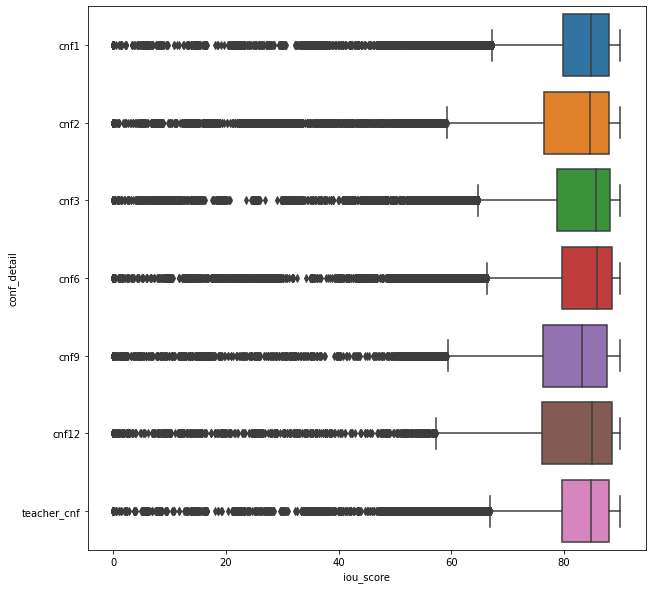

In [20]:
# score_report['confidence_ratio'] = np.log(score_report['confidence_ratio'])
fig, ax = plt.subplots(1,1, figsize=(10,10))
sns.boxplot(x='iou_score', y = 'conf_detail', data = score_report)

In [21]:
q1 = score_report.groupby("conf_detail").describe()['iou_score']['25%']
q3 = score_report.groupby("conf_detail").describe()['iou_score']['75%']
iqr = q3 - q1

iqr


conf_detail
cnf1            8.321201
cnf2           11.527500
cnf3            9.368405
cnf6            8.870942
cnf9           11.313848
cnf12          12.508464
teacher_cnf     8.448820
dtype: float64

While the confidence ratio has a variability around 1 that is low (that means that the confidence of the model in predicting something does not change too much), the iou_score is more sensible.

On the basis of the resilience (iou_score), models  can be ranked with respect to the interquantile distance:
- teacher_cnf
- cnf1
- cnf6
- cnf3
- cnf9
- cnf2
- cnf12

In [22]:
score_report.columns

Index(['FaultID', 'imID', 'layer', 'kernel', 'channel', 'row', 'col',
       'bitmask', 'G_lab', 'g_bb', 'F_count', 'F_lab', 'G_count', 'G_score',
       'T_count', 'area_ratio', 'confidence_covered', 'f_candidate_conf',
       'conf_detail', 'bit_faulty_position', 'iou_score', 'confidence_ratio'],
      dtype='object')

## Area ratio

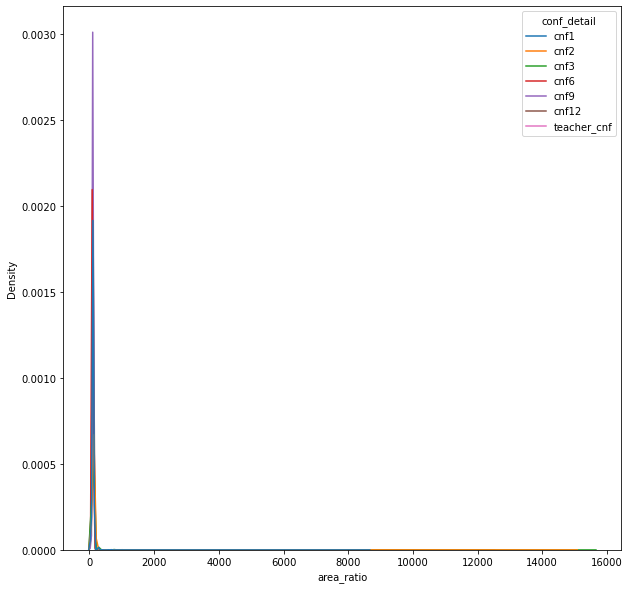

In [23]:
fig, ax = plt.subplots(1,1, figsize=(10,10))
sns.kdeplot(ax=ax, data=score_report, x= 'area_ratio', hue='conf_detail')

In [24]:
score_report[score_report['area_ratio']>200].groupby(by='conf_detail').groups
for key, indices in score_report[score_report['area_ratio']>200].groupby(by='conf_detail').groups.items():
    print(f'{key}: {len(indices)}')

cnf1: 746
cnf2: 1587
cnf3: 1950
cnf6: 272
cnf9: 216
cnf12: 137
teacher_cnf: 740


In [25]:
print(f"number of boxes whose area is the double of the fault free model: {len(score_report[score_report['area_ratio']>200])}")
print(f"which represents the {(len(score_report[score_report['area_ratio']>200]) / len(score_report))*100}% of the total critical boxes")

number of boxes whose area is the double of the fault free model: 5648
which represents the 0.6359014082604133% of the total critical boxes


### Cutting off these outliers let us see the distribution

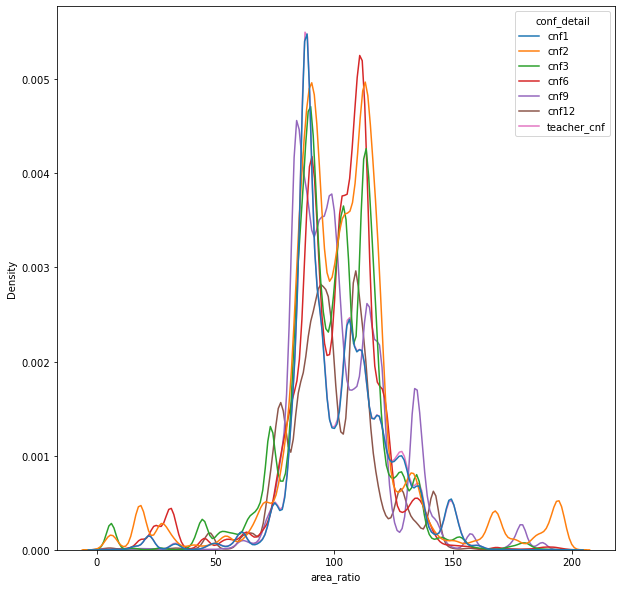

In [26]:
normal_area = score_report[score_report['area_ratio']<200]
fig, ax = plt.subplots(1,1, figsize=(10,10))
sns.kdeplot(ax=ax, data=normal_area, x= 'area_ratio', hue='conf_detail')

In [28]:
print(len(score_report[score_report['area_ratio'] <= 50])/len(score_report))
print(len(score_report[score_report['area_ratio'] >= 200])/len(score_report))
print(len(score_report.query("area_ratio >= 50 and area_ratio <= 200")))

0.021144172179763745
0.006389413052191653
863771


## Classification task evaluation

In [29]:
general_report['confidence_ratio'] = general_report['f_candidate_conf'] / general_report['G_score']
score_report = general_report.query("F_lab!=G_lab and confidence_covered==1.0")

Text(0.5, 1.0, 'confidence ratio')

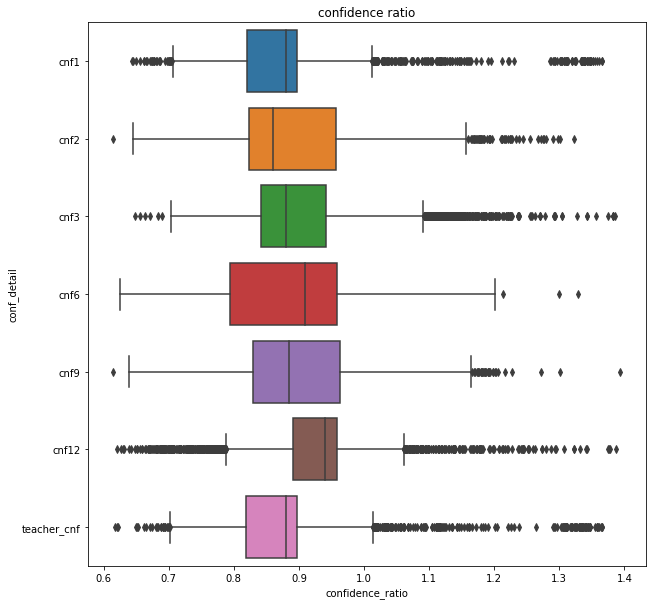

In [30]:
# score_report['confidence_ratio'] = np.log(score_report['confidence_ratio'])
fig, ax = plt.subplots(1,1, figsize=(10,10))
sns.boxplot(x='confidence_ratio', y = 'conf_detail', data = score_report)
ax.set_title('confidence ratio')

It means that if it wrongly predicts the bounding box, then also the label classification is hardly affected. (This implication comes from the fact that the regression is first performed and then the classification)

Text(0.5, 1.0, 'iou score')

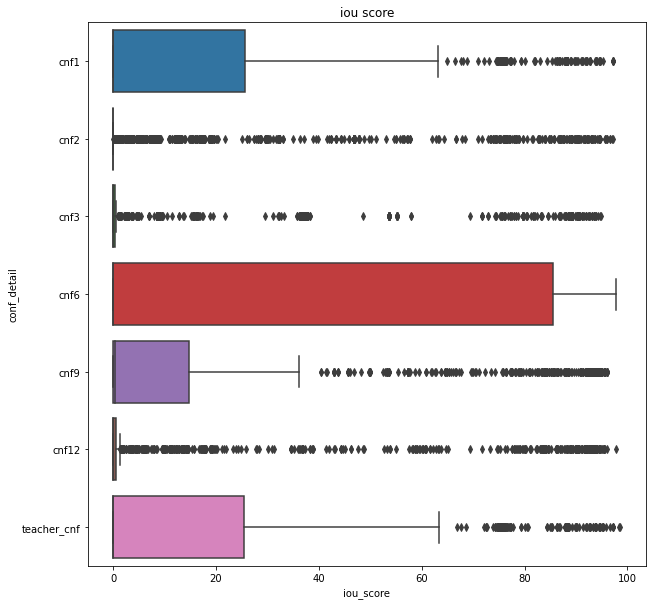

In [31]:
# score_report['confidence_ratio'] = np.log(score_report['confidence_ratio'])
fig, ax = plt.subplots(1,1, figsize=(10,10))
sns.boxplot(x='iou_score', y = 'conf_detail', data = score_report)
ax.set_title('iou score')

Actually the very impacting fault features are row and column which have some picks both in 0 and 1 with 20% of prevalence. 

## Confidence analysis

In [32]:
general_report['confidence_ratio'] = general_report['f_candidate_conf'] / general_report['G_score']
# score_report = general_report.query("confidence_covered==0.0")
general_report['confidence_coverage'] = general_report.groupby(by=['conf_detail', 'bit_faulty_position'])['confidence_covered'].transform(lambda x: x.sum())
general_report['confidence_coverage']

1822388    14960.0
414913       291.0
414914       291.0
414915       291.0
414916       291.0
            ...   
1958446       82.0
1958445       82.0
1958444       82.0
1958454       82.0
886320     14211.0
Name: confidence_coverage, Length: 2411974, dtype: float64

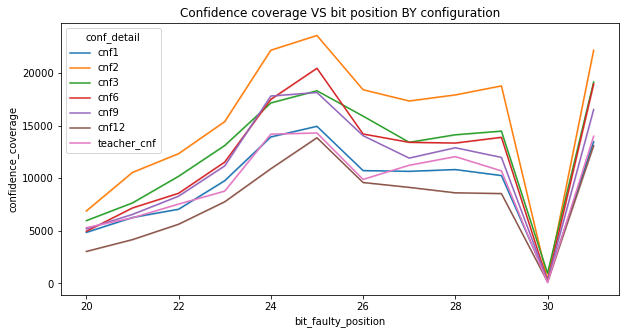

In [33]:
fig, ax = plt.subplots(1,1, figsize=(10,5))
sns.lineplot(ax=ax, data = general_report, x = 'bit_faulty_position', y = 'confidence_coverage', hue='conf_detail')
ax.grid()
ax.set_title("Confidence coverage VS bit position BY configuration")
ax.grid()

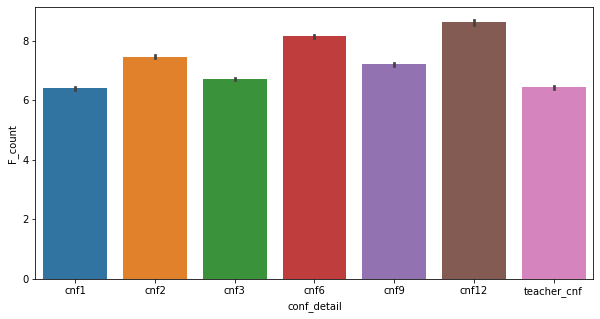

In [36]:
fig, ax = plt.subplots(1,1, figsize=(10,5))
under_analysis = general_report.query("F_count == G_count")
sns.barplot(data=under_analysis, y='F_count', x='conf_detail')

In [37]:
# F_count > G_count
# F_count == G_count
# F_count < G_count

# per ogni configurazione, il numero di volte che F_count < 
print(len(general_report.query("F_count > G_count"))/len(general_report))
general_report.query("F_count > G_count")[['F_count', 'conf_detail']].groupby(by='conf_detail').plot(kind='bar')

0.25645301317510055
